# Assignment #1 - Linear Regression

## <font color="blue"> Name :- Sumedh Joglekar </font> &emsp; &emsp; &emsp;<font color="blue"> Student_ID :- 801084301 </font>

# Introduction

In the Assignment #0, we visialize the data for regression and classification. Now in this assignment, we are required to implement two methods namely Least Square and Least Mean Squre on the dataset. For this assignment I have used 'California House Price' dataset to predict households based on different features.


# Data

For this assignment, I have selected the 'California Housing Price' dataset. This data set contains the information about the population, households, house location(longitude, latitude), price information, number of rooms/bedrooms etc. With the use of these features regression model can be developed for the prediction. Below are the detailed description of each columns present in this dataset.

## Description :- 

1. longitude, latitude : It gives the information about the location of the house. 
2. totalRooms: Total number of rooms present in the house
3. totalBedrooms: Total number of bedrooms present in the house
4. population: Population within particular area
5. households: It gives information related to the group of people residing within a particular home.
6. housingMedianAge: Median age of a house within a block
7. medianIncome: Median income(in ten thousand USD) for households within a block
8. medianHouseValue: Median house value for households (in USD)
9. OceanProximity: Location of the house from ocean

## Source :

https://www.kaggle.com/neuromusic/avocado-prices


In [1]:
### Importing the required libraries ######

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
#############################################

## Reading the data 

Here I am reading the data from CSV file with the use of pandas read_csv function.

P.S. :- Place the file path in read_csv function while running the code so that csv file will get read.

In [2]:
######### Read CSV file and select all the features ############
data = pd.read_csv("housing.csv", encoding='utf-8')# Place the file location here.
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


 ## Pre-processing of Data :- 

In [3]:
#################  Checking for thr null Values ################
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [4]:
#################  Dropping the null Values ################
data = data.dropna()
print("Data Shape is :- ",data.shape)
data.isnull().sum()

Data Shape is :-  (20433, 10)


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

## Visualization using plots and Preliminary Observation of data 

Text(0.5, 1.0, 'Count of Geographic Categories')

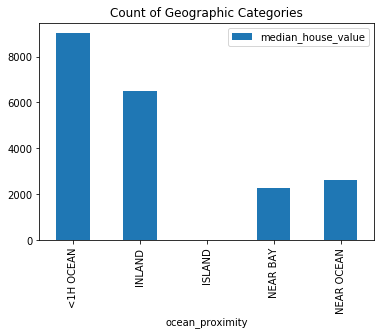

In [5]:
################# Data Visualization to see the number of houses near ocean proximity. #################
datafram_bar = data[['ocean_proximity', 'median_house_value']]
#datafram_bar.columns = ['ocean_proximity', 'count']
datafram_bar.groupby('ocean_proximity').count().plot(kind='bar')
plt.title('Count of Geographic Categories')

### Preliminary Observation :-

- Above bar graph shows that number of houses present at distance greater than 1 hour from ocean are more.
- But this does not give the much information about the distribution of housholds. Hence we need to plot graphs against different features so that best features can be selected for the training and prediction.

In order to find the correlation between different features, plotting correlation matrix graph.

population            0.025300
longitude             0.045398
total_bedrooms        0.049686
households            0.064894
housing_median_age    0.106432
total_rooms           0.133294
latitude              0.144638
median_income         0.688355
Name: median_house_value, dtype: float64

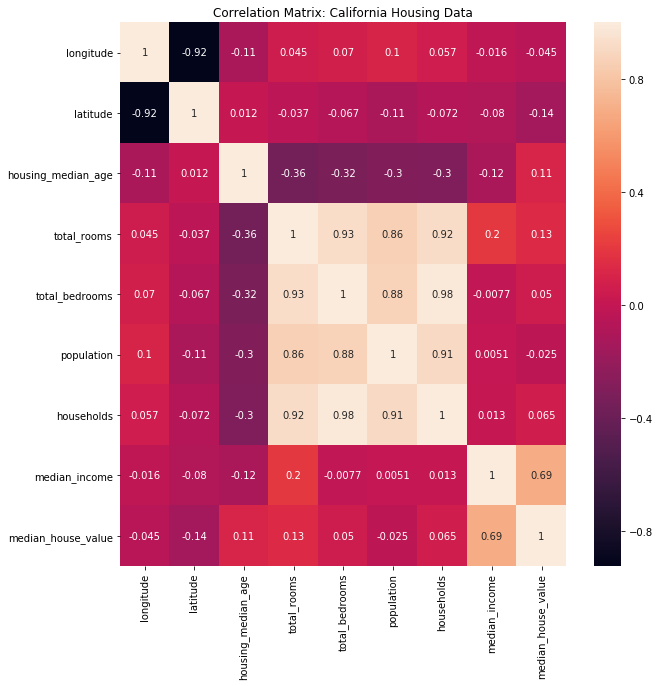

In [6]:
##### Plotting Correlation matrix to check the relation between different features ####
corr_matrix = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot= True)
plt.title('Correlation Matrix: California Housing Data')
feature_list = abs(corr_matrix.iloc[:-1,-1]).sort_values()
feature_list

### Preliminary Observation :-

Above correlation matrix shows that total_rooms,total_bedrooms,population,households are strongly connected to each others and these features can be used for the regression to have better results.

- Plotting histogram of all features to check the data distribution. This will be hepful to check how data is distributed, any outliers are present or not, data is normalized or not, etc.

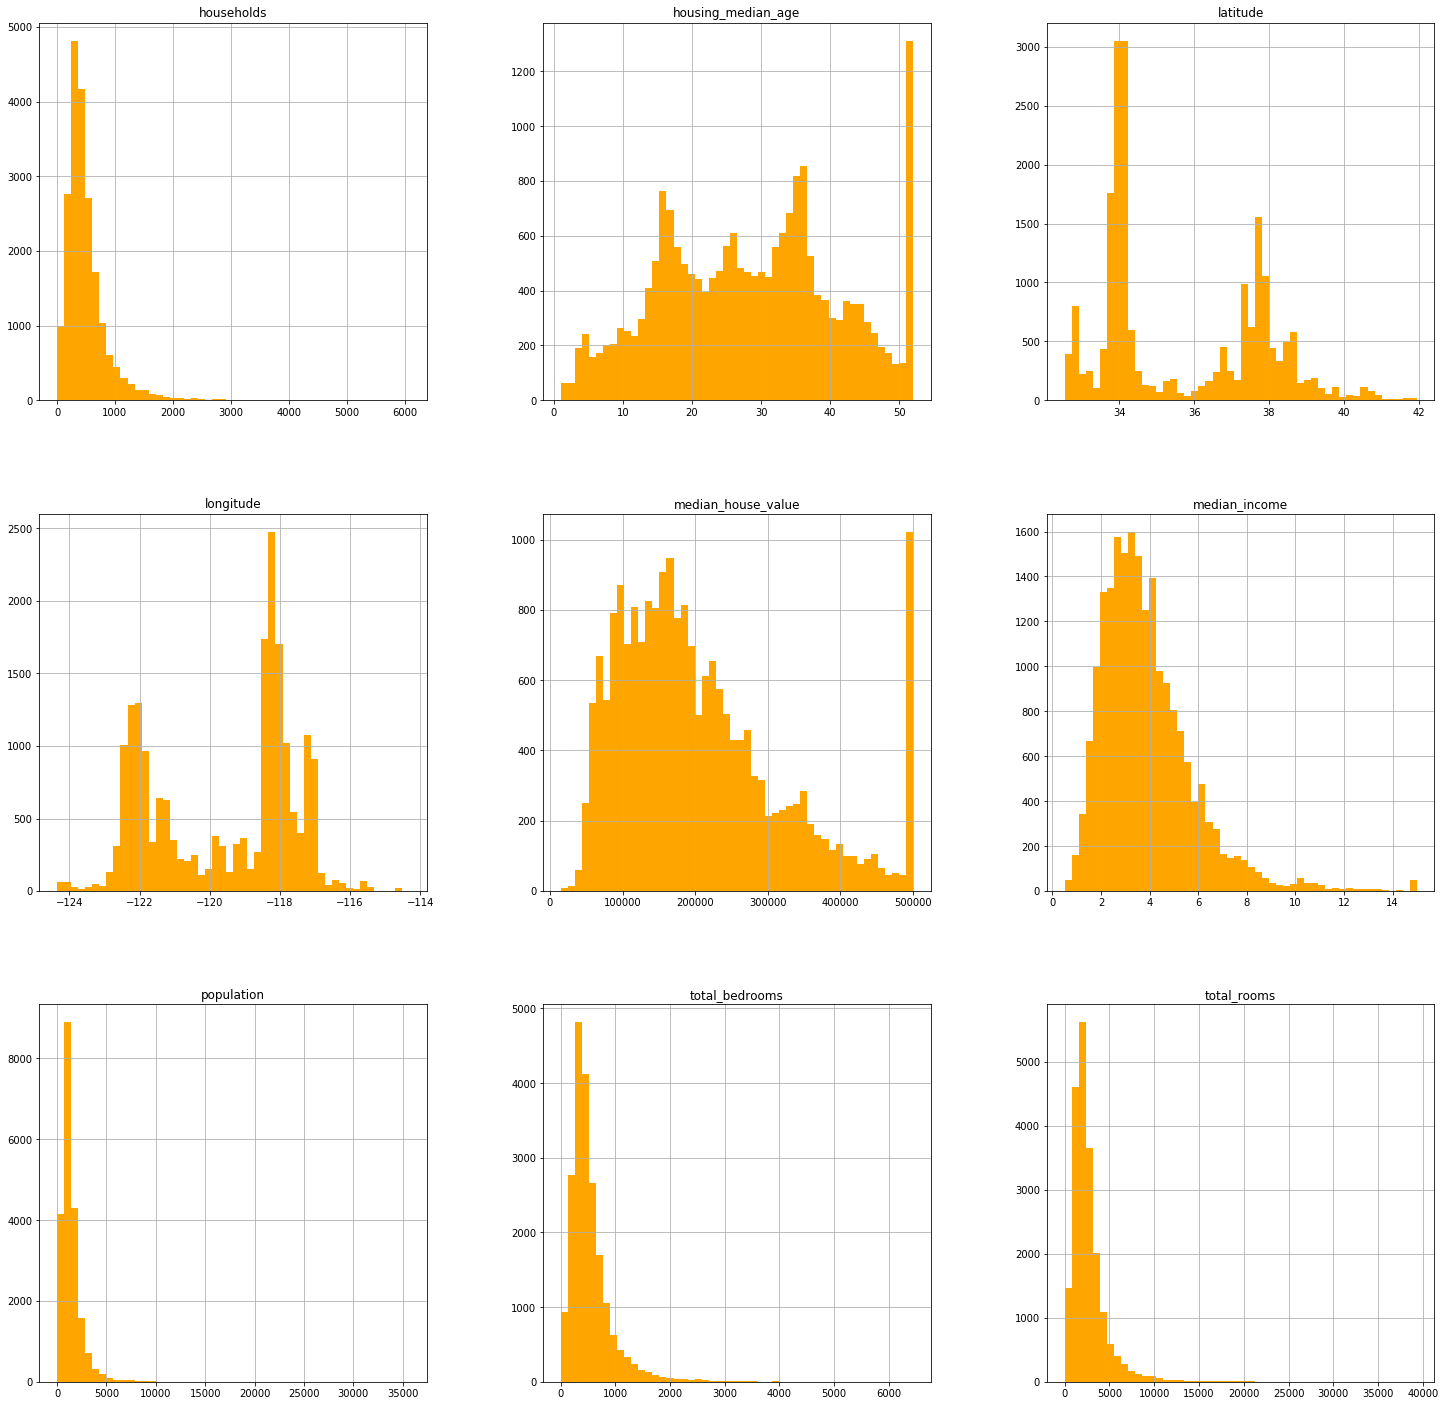

In [7]:
#### Now plotting histogram for all features to check distribution #######
data.hist(bins=50, figsize=(25,25),color = 'orange')
plt.show()

### Preliminary Observation:-

- As the data is not distributed uniformly, we will have many outliers in such case. Next step will be to remove such outliers are they might be present due to the wrong data. 
- But before proecessing and removal of outlier, plotting scatter graph to see the relation(linear,quadraric etc) with target variable(household).

#### Separating out feature matrix and target matrix from main data  frame.

In [8]:
X_total = data[['population','total_bedrooms','median_income','total_rooms','longitude','latitude','median_house_value','housing_median_age']].copy()
T_total = data[['households']].copy()

#### Plotting scatter plot of all selected features against the target variable to see the distribution of feature variable against target variable.

Feature Set :-  ['population' 'total_bedrooms' 'median_income' 'total_rooms' 'longitude'
 'latitude' 'median_house_value' 'housing_median_age']


<Figure size 432x288 with 0 Axes>

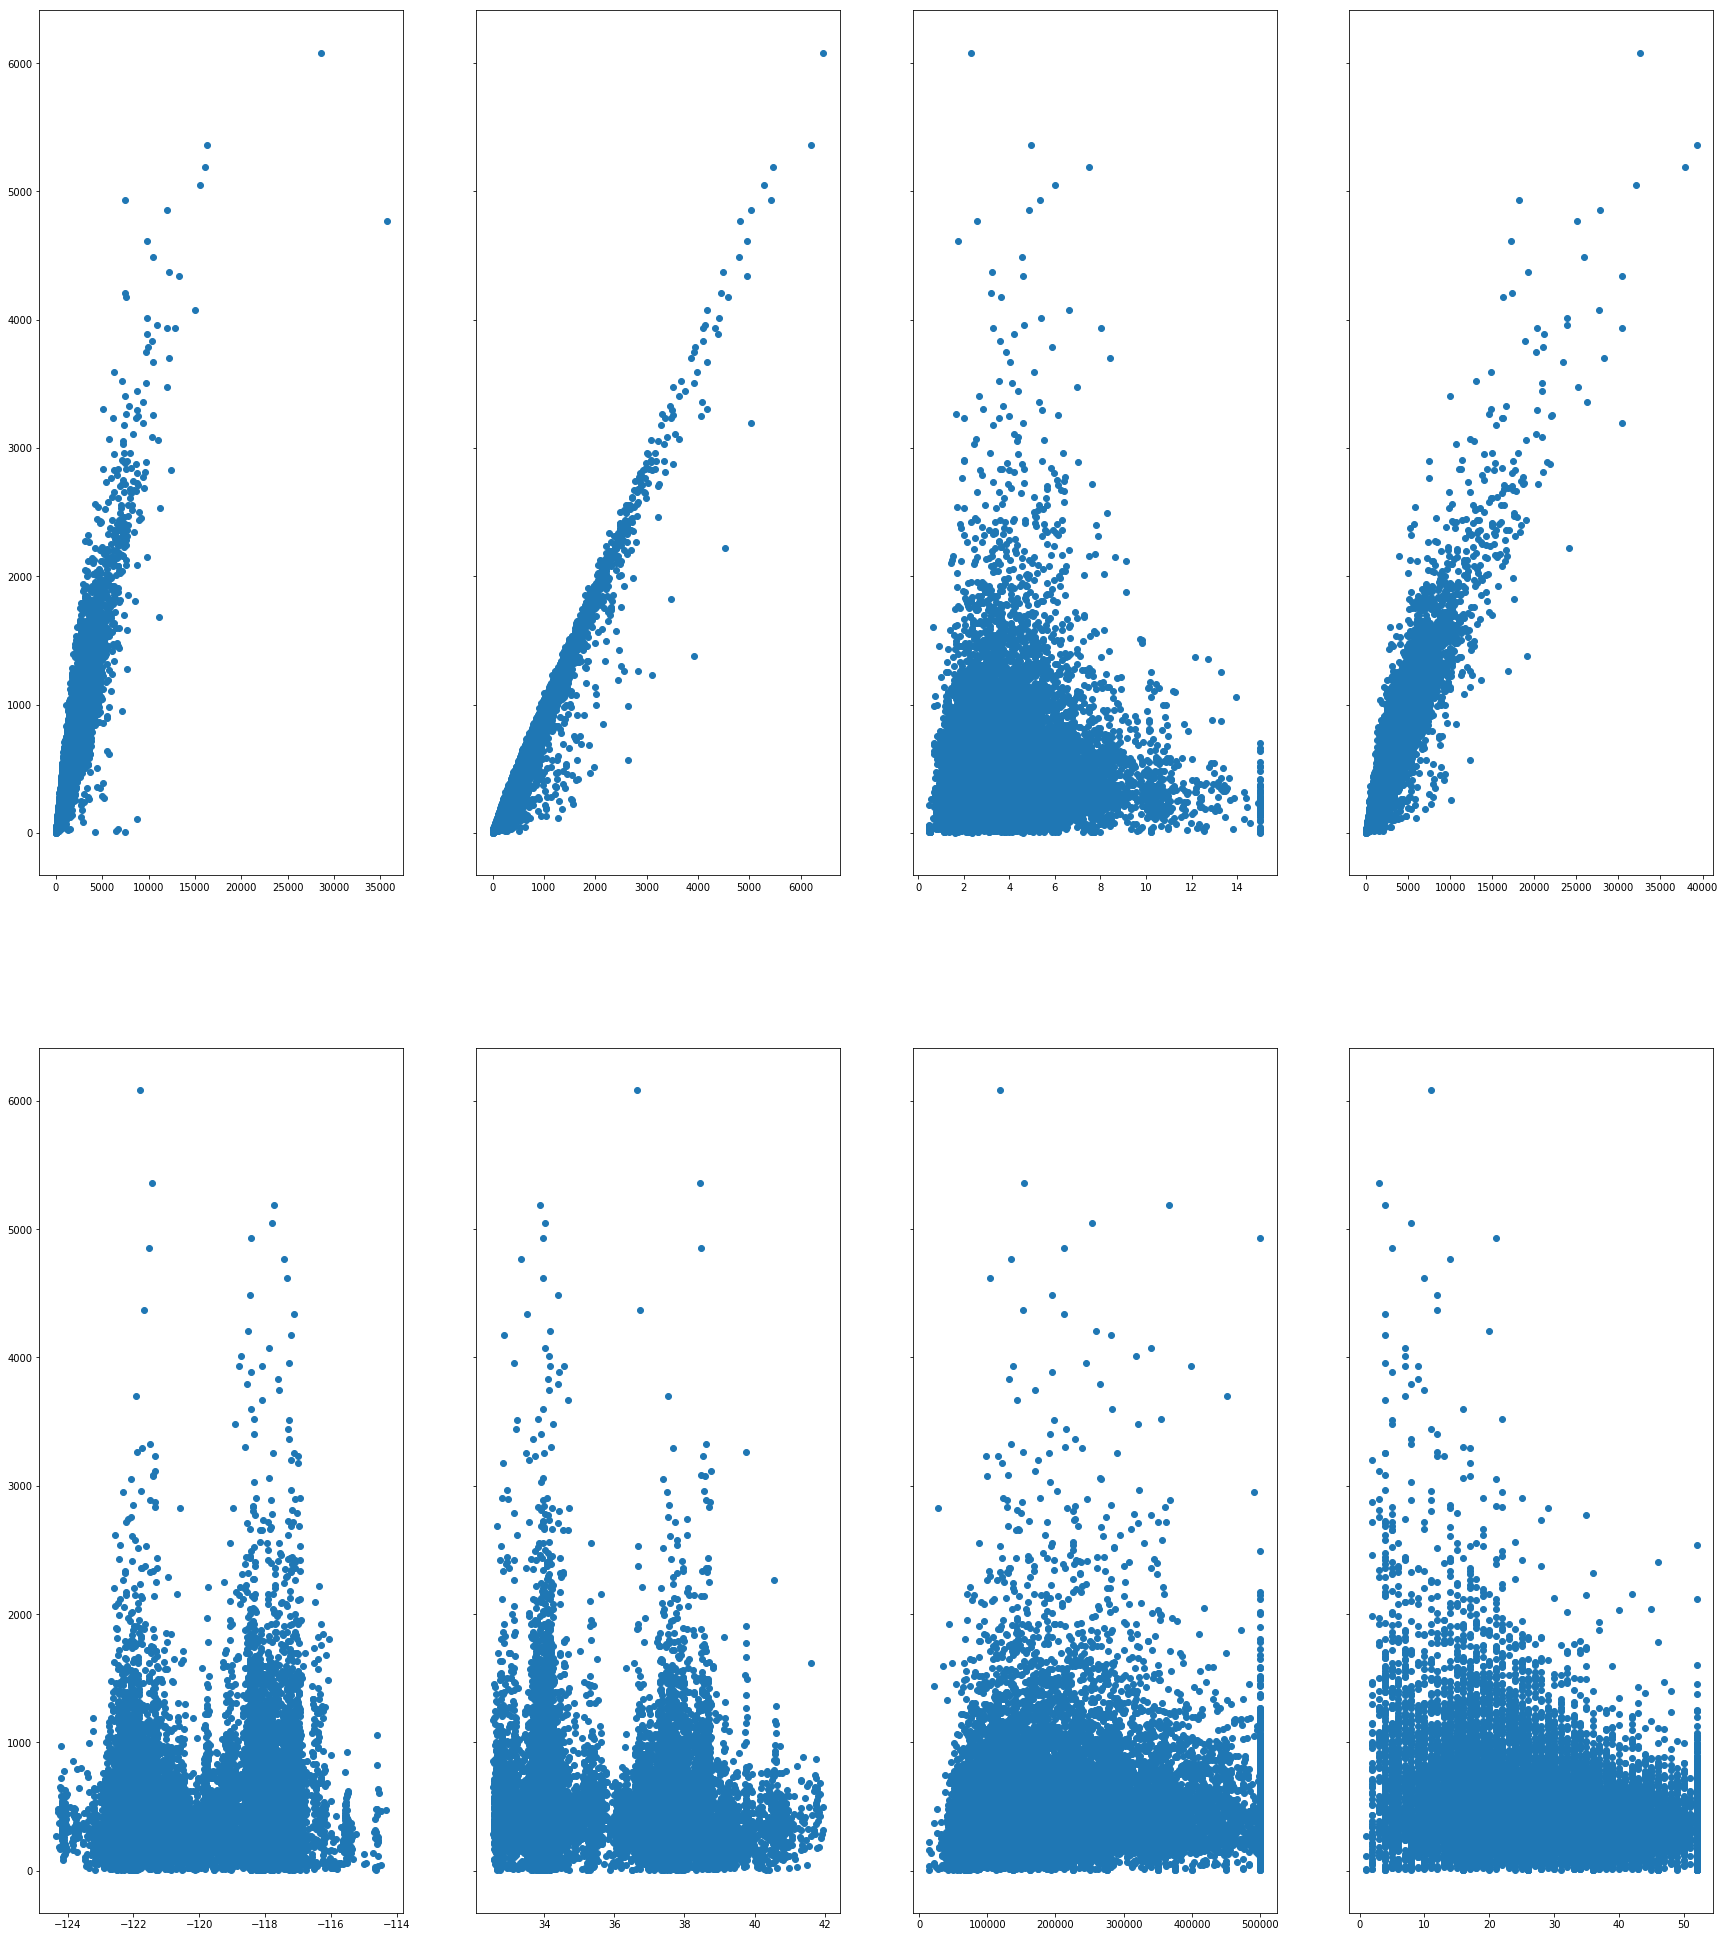

In [9]:
##### Scatter plot of features vs. target variable #####
f = plt.figure()
f, axes =plt.subplots(2,4,figsize=(30,35),sharey=True)
#print(X_total.shape,T_total.shape)
print("Feature Set :- ",X_total.columns.values)
#for i in range(1,X_total.shape[1]):
    #plt.scatter(X_total[X_total.columns.values[i]],T_total.households,ax=axes[i%6])
    #plt.show()
axes[0][0].scatter(X_total[X_total.columns.values[0]],T_total.households)
axes[0][1].scatter(X_total[X_total.columns.values[1]],T_total.households)
axes[0][2].scatter(X_total[X_total.columns.values[2]],T_total.households)
axes[0][3].scatter(X_total[X_total.columns.values[3]],T_total.households)
axes[1][0].scatter(X_total[X_total.columns.values[4]],T_total.households)
axes[1][1].scatter(X_total[X_total.columns.values[5]],T_total.households)
axes[1][2].scatter(X_total[X_total.columns.values[6]],T_total.households)
axes[1][3].scatter(X_total[X_total.columns.values[7]],T_total.households)
plt.show()

### Preliminary Observation :- 

- Above scatter plot describes the data-set in more detailed manner. From above graph it can be inferred that features in first row are linearly dependant on target variable. Hence these features can be consdered while traning the model to have more accuracy.


- One of the important observation can be done is that there are many outliers present in the data. So before training LS and LMS we need to remove them. As a result next step will be to remove the outliers as outliers may affect the prediction.

- Now analysing each and every possible feature using Box-plots to check mean, quaniles and exteme points in the sampled data-set.

Features considered for box-plot :- 
1 . housing_median_age
2 . total_rooms
3 . total_bedrooms
4 . population
5 . households
6 . median_income
7 . median_house_value


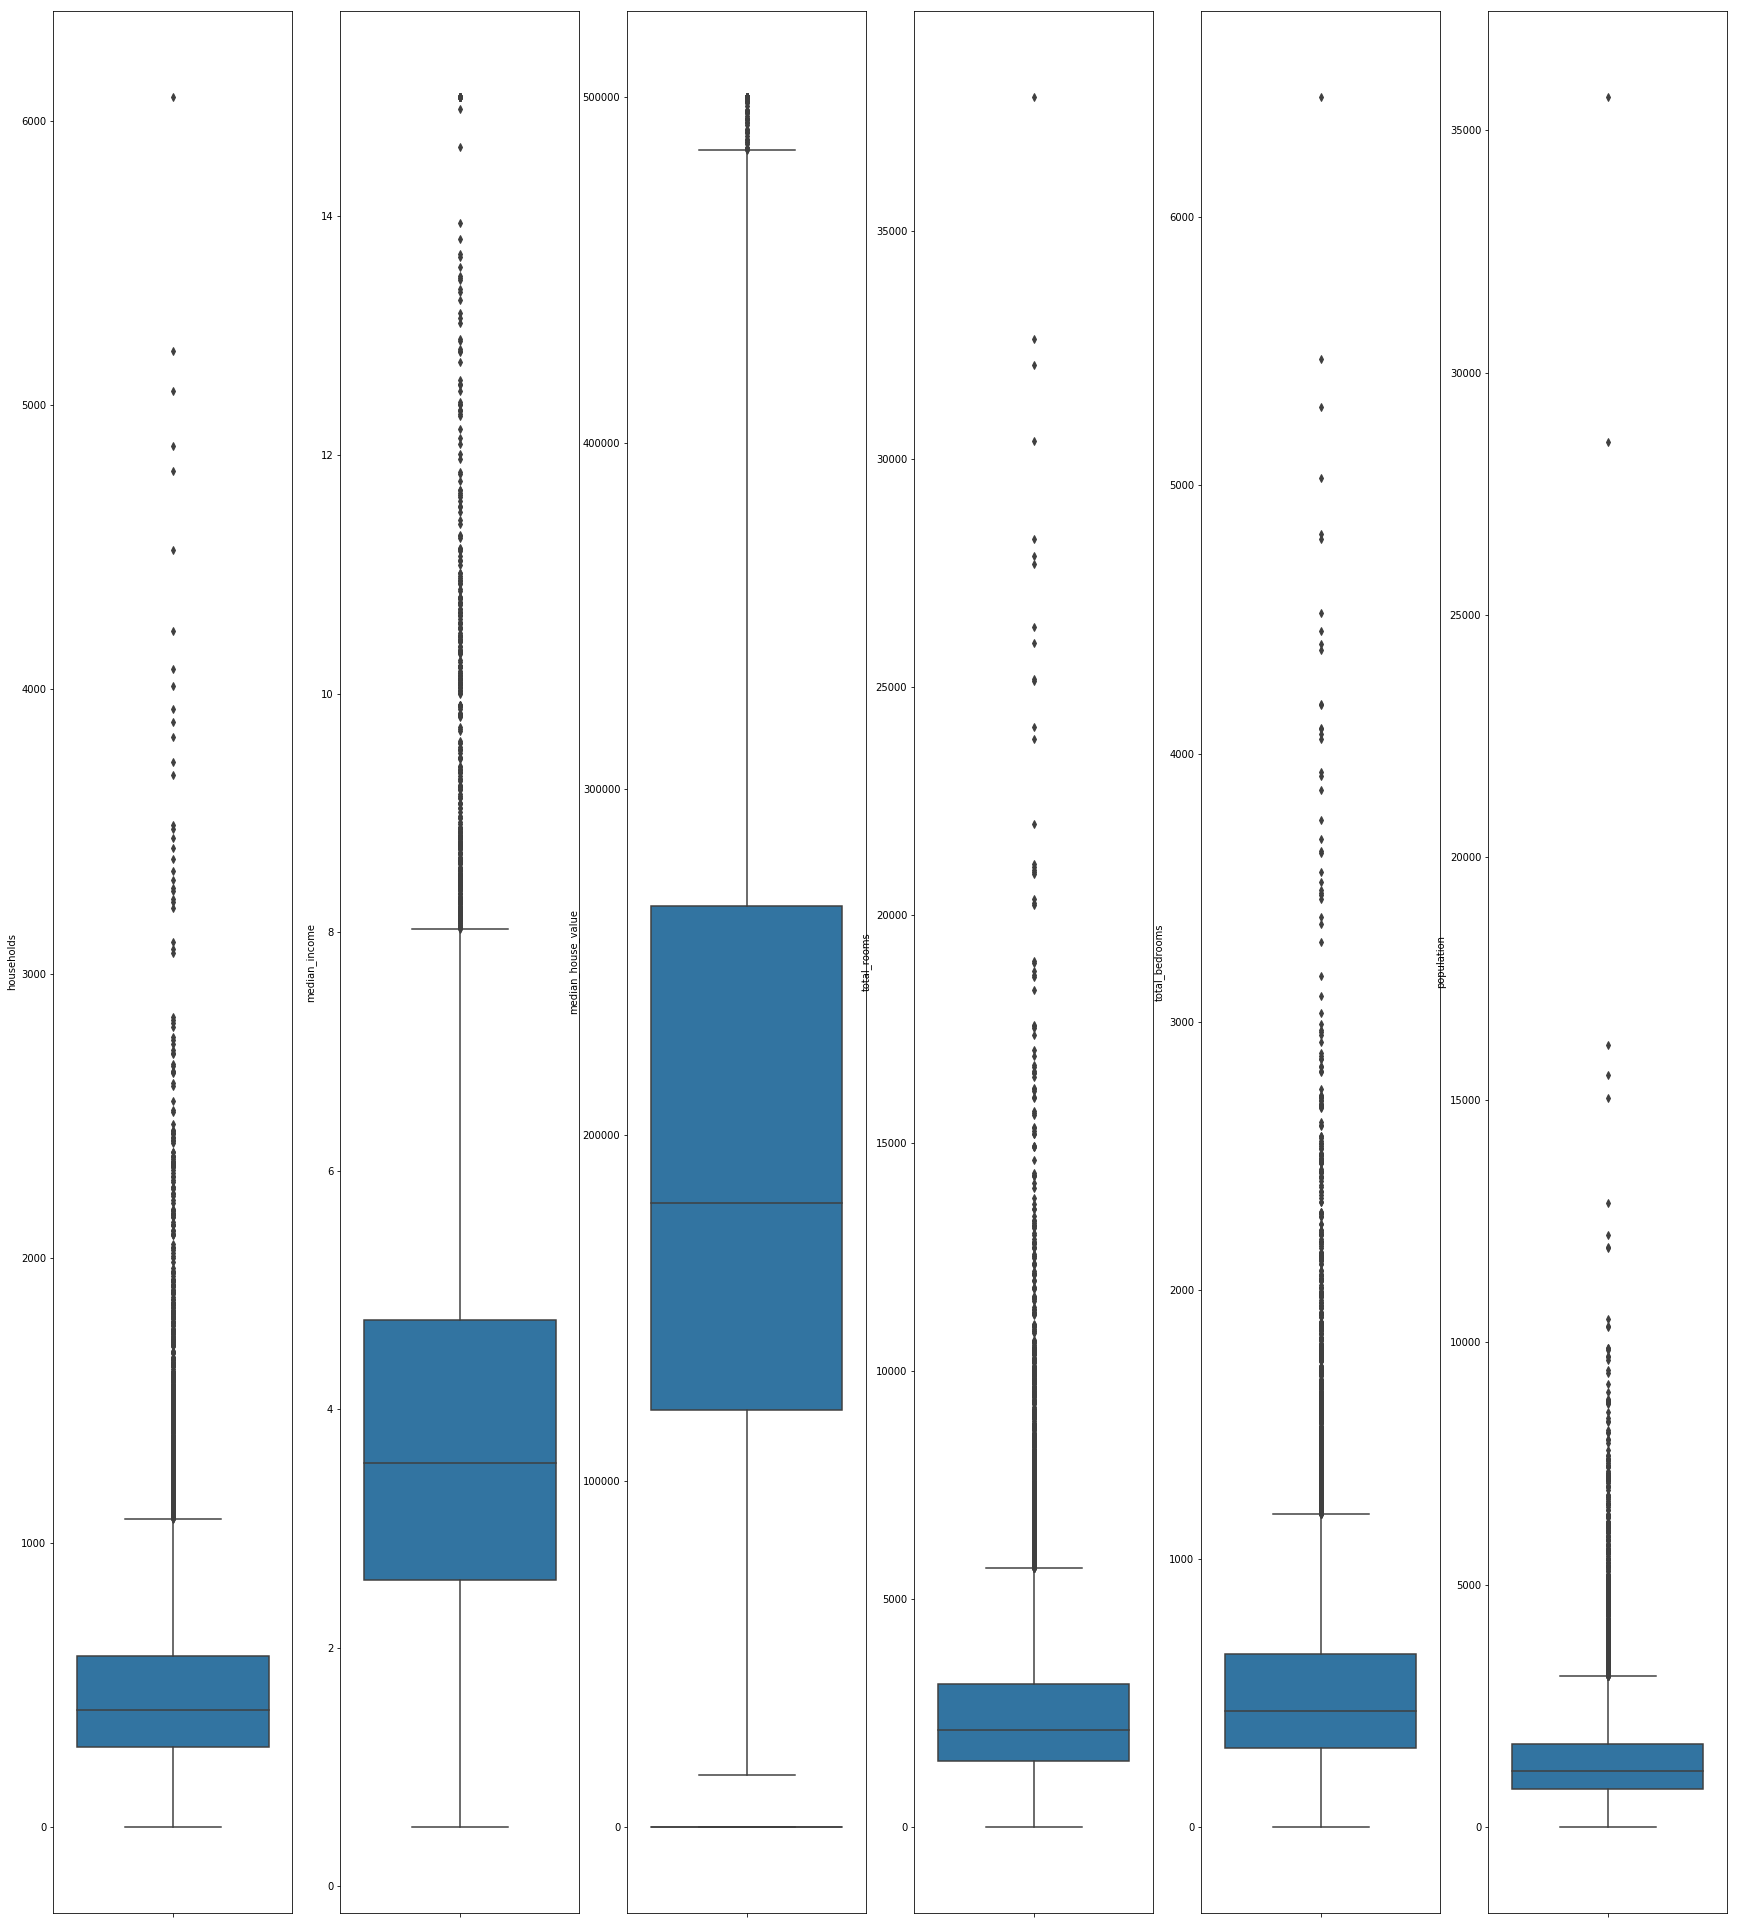

In [10]:
################# Sampling out 12000 data points and plotting box-plots on it ##################
data2 = data.sample(12000)
print("Features considered for box-plot :- ")
fig, axes =plt.subplots(1,6,figsize=(30,35))
for i in range (2,data2.shape[1]-1):
    #fig = plt.figure(figsize = (7, 7))
    print(i-1,".",data2.columns.values[i])
    sns.boxplot(y=str(data2.columns.values[i]),data=data2,ax=axes[i%6])

### Preliminary Observation :- 

Above box plot confirms that there are many outliers present in the data , mainly in household, total room , total bedroom, population.

Removing these outliers below, in the pre-processing part so that it will not cause problem while training.

## Pre-processing of Data :- 

First we will remove the outliers which are present in the feature set, so that we can only have the required and well distributed data points to work on.

In [11]:
######################### Function to remove outliers ##########################
def findOutliers(dataframe,column):
    #column = "total_rooms" 
    #housing[column].plot.box(figsize=(8,8))
    des = dataframe[column].describe()
    print("Description of :-",column,"\n --------------------------------")
    print(des)
    cummulative = {"count":0,"mean":1,"std":2,"min":3,"25":4,"50":5,"75":6,"max":7}
    Quantile1 = des[cummulative['25']]
    Quantile3 = des[cummulative['75']]
    IQR = Quantile3-Quantile1
    lowerBound = Quantile1-1.5*IQR
    upperBound = Quantile3+1.5*IQR
    data = dataframe[(dataframe [column] < lowerBound) | (dataframe [column] > upperBound)]
    print("-------------------Removing outliers -----------------")
    #remove the outliers from the dataframe
    outlier = dataframe[~dataframe[column].isin(data[column])]
    return outlier

In [12]:
############# Removing the ouliers from population ######################
data2 = findOutliers(data2,"population")
print(data2.shape)

Description of :- population 
 --------------------------------
count    12000.000000
mean      1425.334500
std       1151.760508
min          3.000000
25%        791.000000
50%       1163.500000
75%       1719.000000
max      35682.000000
Name: population, dtype: float64
-------------------Removing outliers -----------------
(11289, 10)


* Similarly removing outliers from total_bedroom and households.

In [13]:
data2 = findOutliers(data2,"total_bedrooms")
print("Data Value after removing outliers : ",data2.shape)
data2 = findOutliers(data2,"households")
print("Data Value after removing outliers : ",data2.shape)

Description of :- total_bedrooms 
 --------------------------------
count    11289.000000
mean       469.903180
std        267.329276
min          2.000000
25%        288.000000
50%        419.000000
75%        597.000000
max       3098.000000
Name: total_bedrooms, dtype: float64
-------------------Removing outliers -----------------
Data Value after removing outliers :  (10903, 10)
Description of :- households 
 --------------------------------
count    10903.000000
mean       413.218013
std        200.866935
min          2.000000
25%        270.000000
50%        386.000000
75%        536.000000
max       1075.000000
Name: households, dtype: float64
-------------------Removing outliers -----------------
Data Value after removing outliers :  (10776, 10)


* Removing outliers from population, total_bedroom, households may not be sufficient as there are some extreme values present in median_income, total_rooms. Hence removing them as well to have more better data distribution.

In [14]:
############# Removing the ouliers from rest features (median_income,total_rooms) ######################
data2 = findOutliers(data2,"median_income")
print("Data Value after removing outliers : ",data2.shape)
data2 = findOutliers(data2,"total_rooms")
print("Data Value after removing outliers : ",data2.shape)
data2 = findOutliers(data2,"total_bedrooms")
data2 = findOutliers(data2,"population")
print("Data Value after removing outliers : ",data2.shape)
X_total = data2[['population','total_bedrooms','median_income','latitude','median_house_value','housing_median_age']].copy()
T_total = data2[['households']].copy()

Description of :- median_income 
 --------------------------------
count    10776.000000
mean         3.871261
std          1.908226
min          0.499900
25%          2.555500
50%          3.543850
75%          4.760525
max         15.000100
Name: median_income, dtype: float64
-------------------Removing outliers -----------------
Data Value after removing outliers :  (10423, 10)
Description of :- total_rooms 
 --------------------------------
count    10423.000000
mean      2127.996258
std       1069.259003
min          6.000000
25%       1379.000000
50%       1979.000000
75%       2746.500000
max       7104.000000
Name: total_rooms, dtype: float64
-------------------Removing outliers -----------------
Data Value after removing outliers :  (10238, 10)
Description of :- total_bedrooms 
 --------------------------------
count    10238.000000
mean       428.551182
std        200.652154
min          2.000000
25%        283.000000
50%        405.000000
75%        555.000000
max       1051

Again plotting, box-plots after removal of outliers to see the effect of pre-processing part on the data. 

housing_median_age
total_rooms
total_bedrooms
population
households
median_income
median_house_value


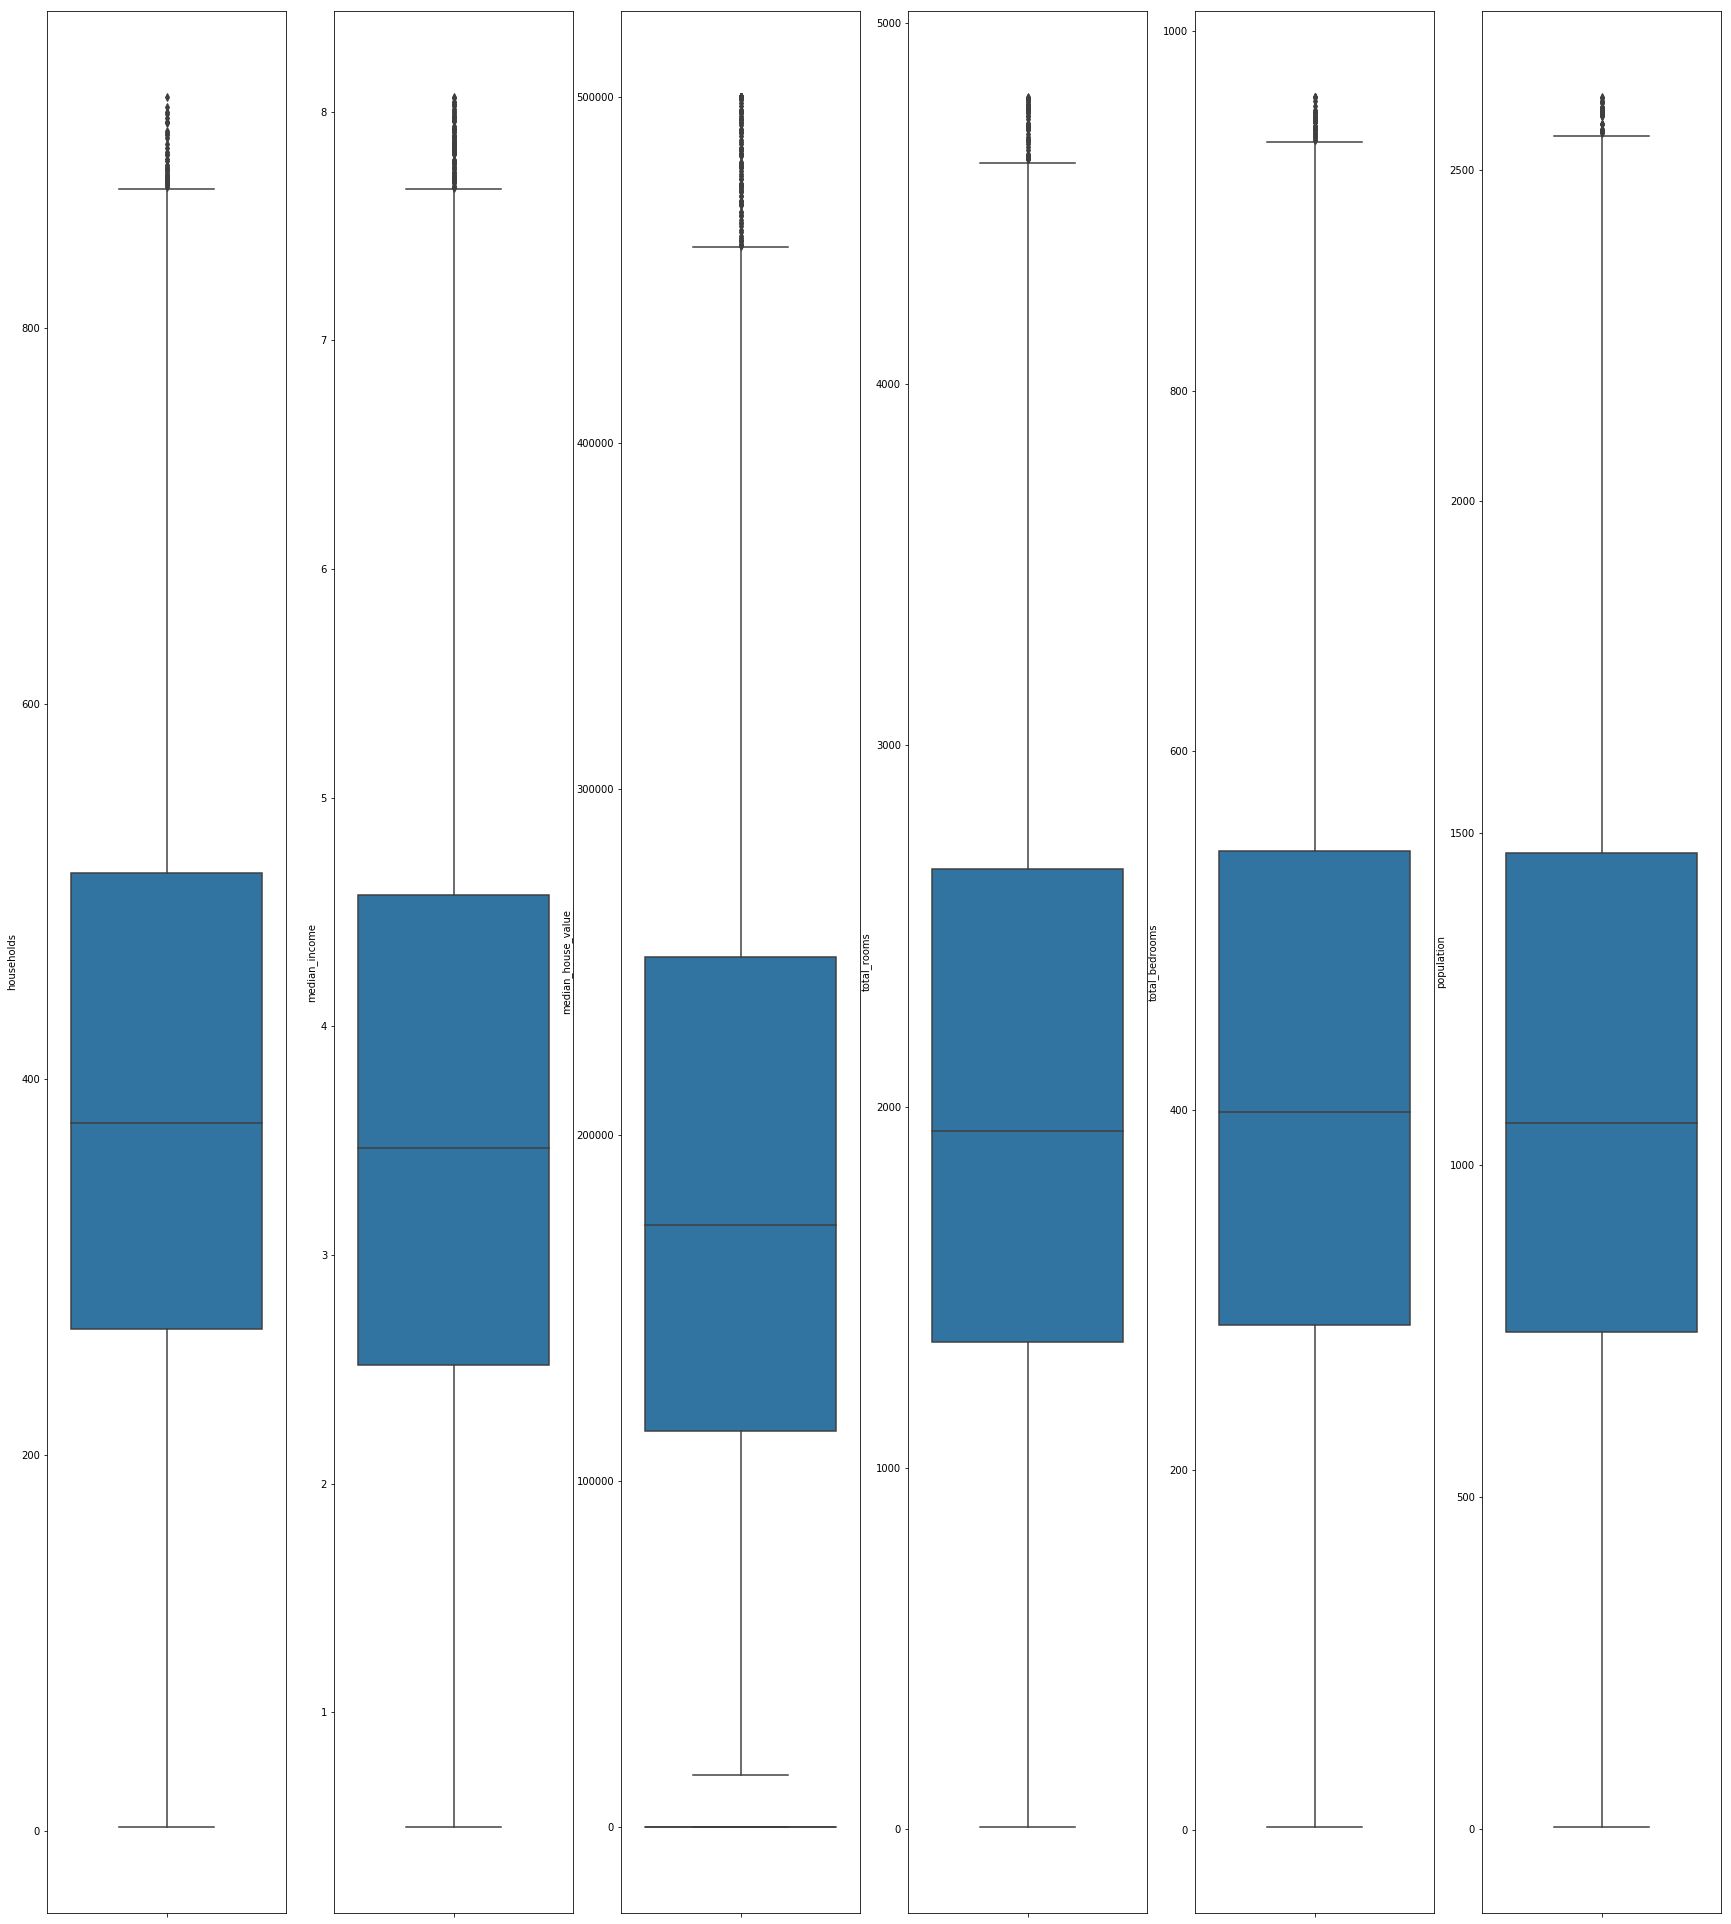

In [15]:
############## Now let us look at the distribution of data after outliers removal #################
#print(data2.shape[1])
fig, axes =plt.subplots(1,6,figsize=(30,35))
for i in range (2,data2.shape[1]-1):
    #fig = plt.figure(figsize = (7, 7))
    print(data2.columns.values[i])
    sns.boxplot(y=str(data2.columns.values[i]),data=data2,ax=axes[i%6])

### Preliminary Observation :- 

1. We can clearly see the difference in two box plots, the one which we plotted before elimination of the outliers and one after outlier removal.
2. Box plot after removal of all outliers is much better than the previuous one and hence the our model will be more efficient on this data.
3. To have more compact data range, we can use rescaling method of the pre-processing and rescale the data in accordance with min and max value of respective feature. So next step will be to rescaling the data and check the effect on boxplots.    
(Source :- https://www.statisticshowto.datasciencecentral.com/normalized/)

In [16]:
print("--------------------- Before Rescaling -----------------------------------")
#print(data2.head())    
def norm(df, feature_name):
    #print(feature_name)
    temp_df = data2.copy()
    maxValue = data2[feature_name].max()
    minValue = data2[feature_name].min()
    temp_df[feature_name] = (data2[feature_name] - minValue) / (maxValue - minValue)
    #print(temp_df)
    return temp_df

Temp_df = pd.concat([X_total, T_total],  axis=1)

for i in range(len(Temp_df.columns.values)):
    print("Mean of ",Temp_df.columns.values[i],data2[Temp_df.columns.values[i]].mean())

print("---------------------- After Rescaling  -----------------------------------")
#print(data2.head())
for i in range(len(Temp_df.columns.values)):
    data2 = norm(data2,Temp_df.columns.values[i])
    print("Mean of ",Temp_df.columns.values[i],data2[Temp_df.columns.values[i]].mean())

#print(data2.head())
X_total = data2[['population','total_bedrooms','median_income','latitude','median_house_value','housing_median_age']].copy()
T_total = data2[['households']].copy()

--------------------- Before Rescaling -----------------------------------
Mean of  population 1122.564631956912
Mean of  total_bedrooms 420.50718132854576
Mean of  median_income 3.642126959904227
Mean of  latitude 35.690129662876544
Mean of  median_house_value 196812.793636545
Mean of  housing_median_age 30.00289247955316
Mean of  households 394.27817674047475
---------------------- After Rescaling  -----------------------------------
Mean of  population 0.42961037296888316
Mean of  total_bedrooms 0.43549134373417775
Mean of  median_income 0.41541868851193164
Mean of  latitude 0.33405634711452287
Mean of  median_house_value 0.374872255447495
Mean of  housing_median_age 0.5686841662657565
Mean of  households 0.42592635911017895


Now finally plotting box-plot against common scale as we have removed the outliers and then rescsaled each features with respect to the mean, max and min values of particular feature.

<Figure size 720x504 with 0 Axes>

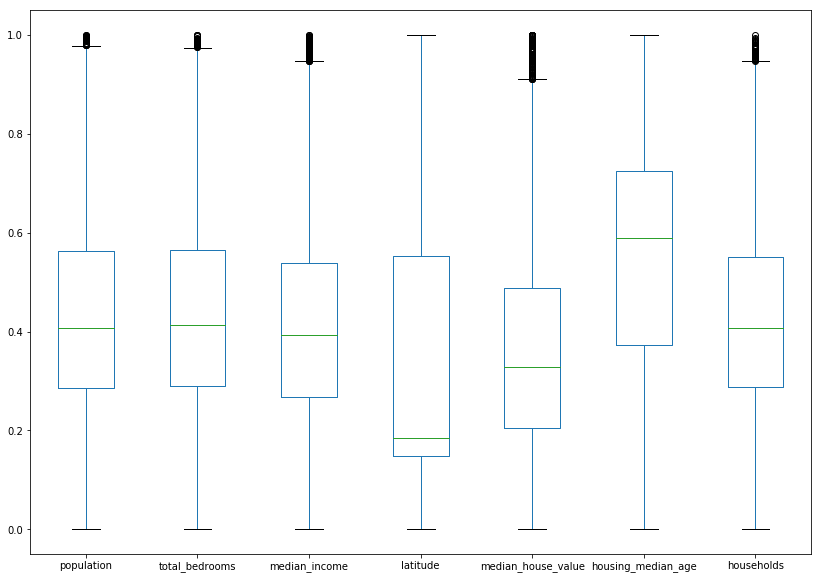

In [17]:
fig=plt.figure(figsize=(10, 7))
Temp_df1 = pd.concat([X_total, T_total],  axis=1)
Temp_df1.plot.box(figsize=(14,10))

## Preliminary Observations Summary :-

Final Box-plot shows that, now we have well distributed set of data which can be used for the training.

From the above observations,it can be seen that chosen data-set with  selected features are following linear trends. This trend is either directly or inversely proportional to the target variable. Hence we can proceed the the selected feature set in order to implement our model.

# Method

To implement linear regression, we have used two differnet methods namely 'Least Square' and 'Least Mean Square'.

Below are the class implementation of these methods.

### Review

Code conatains three classes that are used in order to implement Least Square and Least Mean Square:- 

   1. Super Class
   2. Least Square Class
   3. Least Mean Square Class
   
#### Super Class :- 
    It is an abstarct class that contains the abstract methods such as add_ones , check_matrix etc.
    In short it is an super class for machine learning models
 
#### Least Square Class :- 
    It is the main class for the implementation of least square method.
    It conatains different methods such as train and test to make prediction.
 
#### Least Mean Class :-
    It contains the methods to train and test dataset using LMS method.
 

## Explaination of Codes:-

### Super Classs Definition

* It is an abstract class contains the abstract train and use methods. 
* It also contains methods to perform some basic validation checks so as to raise exception. 
* The 'check_matrix' method will check the shape of the matrix and if it is not 2D then it will raise an error. 
* Similarly we have one more method called, add_ones which is used to add bias in the provided matrix.


In [18]:
import numpy as np 
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    
class LinearModel(BaseModel):
    """
        Abstract class for a linear model 
        
        Attributes
        ==========
        w       ndarray
                weight vector/matrix
    """

    def __init__(self):
        """
            weight vector w is initialized as None
        """
        self.w = None

    # check if the matrix is 2-dimensional. if not, raise an exception    
    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a columwwn basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        """
            train linear model
            
            parameters
            -----------
            X     2d array
                  input data
            T     2d array
                  target labels
        """        
        pass
    
    @abstractmethod
    def use(self, X):
        """
            apply the learned model to input X
            
            parameters
            ----------
            X     2d array
                  input data
            
        """        
        pass

### Least Squares 

- Least Square method is implemented in the 'LinearRegress' class. 
- The objective of least square is to minimize the sum of Euclidean distances between the target values and the model outputs i.e nothing but the erro function. 
- Here we want to find the appropriate weight 'w' paramter which decides the error function value.
- Now to find out 'w', we can use below  equation :- 

$$
w = \big(X^\top X\big)^{-1} X^\top T
$$

- Above equation is implemented in the class LinearRegree with 'X' as feature matrix and 'T' being target matrix.
- This calculated 'w' is used to predict the value in test data.
- y_on_predict in the below code is the predicted value with the use of w and test  feature vector X.

In [19]:
# Linear Regression Class for least squares
class LinearRegress(LinearModel): 
    """ 
        LinearRegress class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
    def __init__(self):
        LinearModel.__init__(self)
        
    # train lease-squares model
    def train(self, X, T):
        X1 = self.add_ones(X)
        #N = X.shape[0]
        #X1 = np.hstack((np.ones((N, 1)), X.reshape((X.shape[0], -1))))
        #X1 = np.hstack((X.reshape((X.shape[0], -1)),T.reshape(T.shape[0],-1)))
        #print(self.w)
        self.w = np.linalg.inv(X1.T @ X1) @ X1.T @ T
        #print(self.w)
        return self.w
        #pass  ## TODO: replace this with your codes
    
    # apply the learned model to data X
    def use(self, X):
        X = self.add_ones(X)
        #print(w.shape,X2.shape)
        y_on_predict = X @ self.w
        N = X.shape[0]
        y_on_predict.shape = (N,1)
        return y_on_predict
        #pass  ## TODO: replace this with your codes

### Least Mean Squares

- In the Least Mean Square method, weight paramter is updated in accordance of pre-defined learning rate and the difference in predicted versus actual value.
- Below is the error function that we need to minimize in Least Mean Square method.

$$
w^{(k+1)} = w^{(k)} - \alpha \nabla E_k 
$$

- After taking derivative, we can get below equiation. In LMS class as well we are implementing the same equation.

$$
w^{(k+1)} = w^{(k)} - \alpha \Big( {w^{(k)}}^\top x_k - t_k \Big) x_k.
$$

- In this LMS class, we are repeatedly training our model step by step for 8000 data samples. In each iteration we are updating the value of weight using above formula where $\alpha$ is learning rate $w^{(k)}$ is current weight $x_k$ is feature matrix and $t_k$ is target matrix.

- For the first iteration, I am initializing the weight with zero matrix and after first iteration weight value is getting updated with respect to learning rate and current prediction.

- In ths use method of LMS class, first I am checkiing the matrix validation by calling add_ones method of super class.

- Once the matrix validation is correct, I am simply multiplying the feature matrix with the calculated weight in the training part to have predicted target value.

In [20]:
import collections # for checking iterable instance

# LMS class 
class LMS(LinearModel):
    """
        Lease Mean Squares. online learning algorithm
    
        attributes
        ==========
        w        nd.array
                 weight matrix
        alpha    float
                 learning rate
    """
    def __init__(self, alpha):
        LinearModel.__init__(self)
        self.alpha = alpha
        self.flag = True
    
    # batch training by using train_step function
    def train(self, X, T):
        for i in range(len(X)):
            #print("Iteration",i)
            if i == 3999 : print("---------------Iteration ",i+1,"-----------------") 
            if i == 7999 : print("---------------Iteration ",i+1,"-----------------") 
            #if (i == 0):
                #print("In if")
                #X_temp = np.append([1], X[i]).reshape(-1,1) 
                #self.w = np.zeros(X_temp.shape[0]).reshape(-1,1)
                #print(X_temp.shape)
            #X1 = np.append([1], X[i]).reshape(-1,1)
            self.train_step(X[i], T[i])
        pass
            
    # train LMS model one step 
    # here the x is 1d vector
    def train_step(self, x, t):
        X1 = np.append([1], x).reshape(-1,1)
        #print(X1)
        #X1 = np.hstack((np.ones(1), x))
        if self.flag: 
            self.w = np.zeros(X1.shape[0]).reshape(-1,1)
            self.flag = False
        #print(x.shape,self.w.shape)
        y_predict =  X1.T @ self.w
        self.w -= self.alpha * (y_predict - t) * X1
        #print(self.w)
        pass
    
    # apply the current model to data X
    def use(self, X):
        X1 = self.add_ones(X)
        Y = X1 @ self.w
        return Y

### Usage Examples

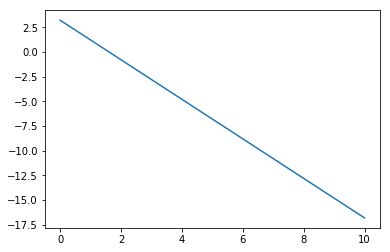

In [21]:
X = np.linspace(0,10, 11).reshape((-1, 1))
T = -2 * X + 3.2

ls = LinearRegress()

ls.train(X, T)

plt.plot(ls.use(X))

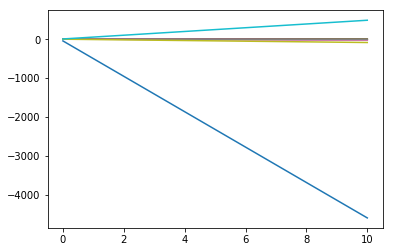

In [22]:
lms = LMS(0.1)
for x, t in zip(X, T):
    lms.train_step(x, t)
    plt.plot(lms.use(X))

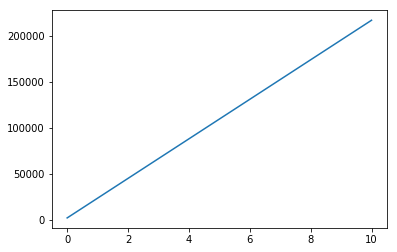

In [23]:
lms.train(X, T)
plt.plot(lms.use(X))
#####################################################################################

# Implementation(Preliminary Test):-

In [24]:
##################### WHAT I WILL RELEASE ############

# Self-Test code for accuracy of your model - DO NOT MODIFY THIS
# Primilnary test data
X = np.array([[2,5],
              [6,2],
              [1,9],
              [4,5],
              [6,3],
              [7,4],
              [8,3]])
T = X[:,0, None] * 3 - 2 * X[:, 1, None] + 3
N = X.shape[0]

def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2))

model_names = ['LS', 'LMS_All', 'LMS_1STEP']
models = [LinearRegress(), LMS(0.02), LMS(0.02)]
#train
for i, model in enumerate(models):
    print("training ", model_names[i], "...") 
    if i == len(models) -1: 
        # train only one step for LMS2
        model.train_step(X[0], T[0])
    else:
        model.train(X, T)

def check(a, b, eps=np.finfo(float).eps):
    if abs(a-b) > eps:
        print("failed.", a, b)
    else:
        print("passed.")

errors = [1.19e-13, 2.8753214702, 38.0584918251]
for i, model in enumerate(models):
    print("---- Testing ", model_names[i], "...", end=" ") 
    # rmse test
    err = rmse(T, model.use(X))
    if check(err, errors[i], eps=1e-10):
        print(i)
        print ("check your weights: ", model.w)
        print ("oracle: ", )

training  LS ...
training  LMS_All ...
training  LMS_1STEP ...
---- Testing  LS ... passed.
---- Testing  LMS_All ... passed.
---- Testing  LMS_1STEP ... passed.


# Experiments

Applying LS and LMS methods on the choose data.

- Below is the detailed explaination of code which is used to run the thress classes that are described above. 

## Description, Codes:-

### Least Square
1. In the least square call, firstly I have splitted the data into training and testing samples using iloc indexer in pandas. While divinding the data into test and train, I have splitted 8000 samples for Train and 2000 for Testing purpose.
2. After dividing the data, I trained the model using least square method by passsing, X_train(feature matrix) and T_train(Target variable) to train method of LinearRegress() class. 
3. Now we have the weights calculated using least square, I am going to use this weights in the 'use' method to predict the target value for test data.
4. In the use method of the least square I am multiplying the feature matrix with the calculated weight matrix, to have predicted target value.
5. Now once we have predicted value using our model, I am checking the RMS error between predicted and actual target using pre-defined function rmse() in the preliminary test.


Train Shape Check: (8000, 6) (8000, 1)
Test Shape Check: (2000, 6) (2000, 1)
Calculated Weights are :- 
 [[-0.03736464]
 [ 0.20091541]
 [ 0.7844835 ]
 [ 0.02708148]
 [ 0.00312404]
 [ 0.02665546]
 [ 0.02329217]]
RMS error between actual and predicted taget for train data is :-  1.781399704214593


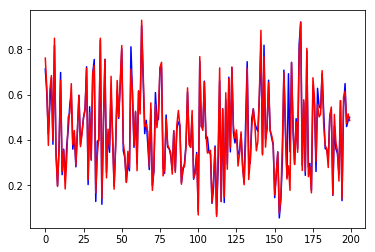

In [25]:
###### Implementation of Least Square ########
# Train data split
X_train = X_total.iloc[0:8000].values
T_train = T_total.iloc[0:8000].values
#T_train
#N = X.shape[0]
print("Train Shape Check:", X_train.shape, T_train.shape)

# Test data split
X_test = X_total.iloc[8000:10000].values
T_test = T_total.iloc[8000:10000].values
print("Test Shape Check:", X_test.shape, T_test.shape)

######## Train model using test data ###########
ls = LinearRegress()
w_from_Train = ls.train(X_train, T_train)
print("Calculated Weights are :- \n",w_from_Train)
########## Predict the result on test data ##########
Y = ls.use(X_test)
#print(Y)
plt.plot(Y[1800:2000],'-b')
plt.plot(T_test[1800:2000],'-r')
print("RMS error between actual and predicted taget for train data is :- ",rmse(T_test,Y))
#print(ls.w)
#ax1 = X_total.plot(kind='scatter', x='housing_median_age', y='households', color='r')    
#ax2 = X_test.plot(kind='scatter', x='total_rooms', y='households', color='g', ax=ax1)

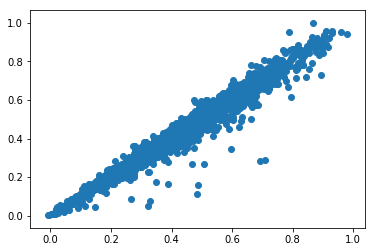

In [26]:
plt.scatter(Y,T_test)

## Visualization :-

- For the Least Square method, We have simply used the calculated 'w' weight to predict the target on test data.
- Above graph shows that predicted and actual values of test data are closely related to each other.
- The calculation error(RMS) is 1.93 on the test data. 
- As the pre-processing part was done in order to remove outliers and normalization, we got more informative weights and hence better result.
- Now applying LMS algorithm on same train and test data to observe the result.
- Scatter plot clearly gives idea about how linearly the data predicted and the test data is related.


## Description, Codes:-

### Least Mean Square

1. In the least mean square, just for convinience I am creating new dataframes for training and testing.
2. These dataframes contains same data as of X_train, T_train, X_test and t_test as I am sampling 8000 data samples from X_total for training and 2000 data samples from T_total.
3. After creating the different dataframes, I set $\alpha$ i.e. learning rate value as 0.002 and passed it to the LMS class. 
4. In the next step I used train method of LMS class to train our model. 'train' method internally calls train_step method, which actually calculates and updates value of weight after each iteration(i.e. after each row from training set).
5. To update the value of weight, learning rate plays very important role. Low learning rate($\alpha$) signifies that over w will get updated very slowly and very high learning rate($\alpha$) states that value of weight will get updtaed with large difference.
6. Setting very low learning rate($\alpha$) might not be helpful as our model will not converge at all and high learning rate is also not advisable as it may lead to converge very soon and in both the cases prediction will not give the expected results and our rmse error will not be minimum.

Train Shape Check: (8000, 6) (8000, 1)
Test Shape Check: (2000, 6) (2000, 1)
---------------Iteration  4000 -----------------
---------------Iteration  8000 -----------------
RMS error between actual and predicted taget for train data is :-  3.283186579166203


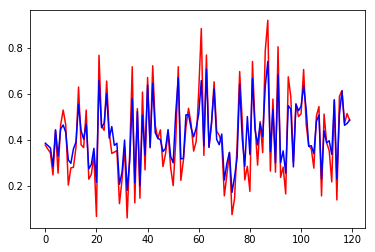

In [27]:
######### LMS Implementation #######
# Train data split
X_train_lms = X_total.iloc[0:8000].values
T_train_lms = T_total.iloc[0:8000].values
T_train
N = X.shape[0]
print("Train Shape Check:", X_train_lms.shape, T_train_lms.shape)

# Test data split
X_test_lms = X_total.iloc[8000:10000].values
T_test_lms = T_total.iloc[8000:10000].values
print("Test Shape Check:", X_test_lms.shape, T_test_lms.shape)
######################
lms = LMS(0.002)
lms.train(X_train_lms, T_train_lms)
Y = lms.use(X_test_lms)
plt.plot(T_test_lms[1880:2000], '-r')
plt.plot(Y[1880:2000], '-b')
#######################
print("RMS error between actual and predicted taget for train data is :- ",rmse(T_test_lms,Y))

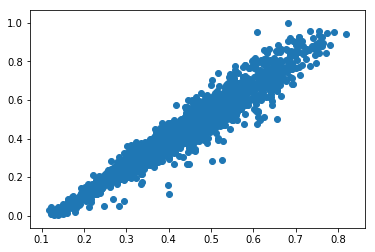

In [28]:
plt.scatter(Y,T_test_lms)

### Visualization :- 

- For the training and testing of LMS, we have used the same data points on which LS was performed, so thay it will be easy to the comparision between these two methods.

- With the LMS, we have got RMS error value as 3.5 with learning rate as 0.002. This can be improved by tuning the learning rate $\alpha$ value.

- Now to have more understanding about the best alpha and effect of alpha on the rmse and graph, running LMS on different set of alpha and calculating the rmse for each alpha.

- Scatter plot clearly gives idea about how linearly the data predicted and the test data is related.

### Now Checking the repsponse of LMS on different alpha ###
------------------------------------------------------
Learning rate(alpha) =  1e-08
---------------Iteration  4000 -----------------
---------------Iteration  8000 -----------------
Graph :- 


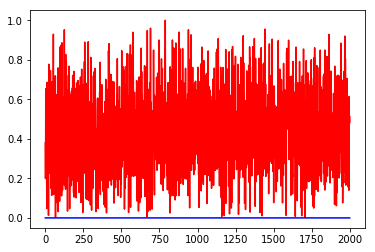

------------------------------------------------------
Learning rate(alpha) =  5e-05
---------------Iteration  4000 -----------------
---------------Iteration  8000 -----------------
Graph :- 


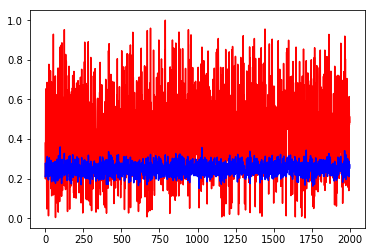

------------------------------------------------------
Learning rate(alpha) =  0.0005
---------------Iteration  4000 -----------------
---------------Iteration  8000 -----------------
Graph :- 


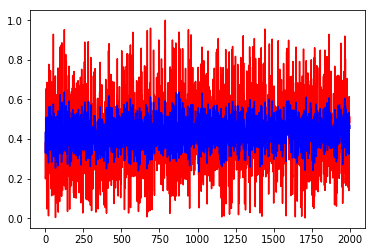

------------------------------------------------------
Learning rate(alpha) =  0.001
---------------Iteration  4000 -----------------
---------------Iteration  8000 -----------------
Graph :- 


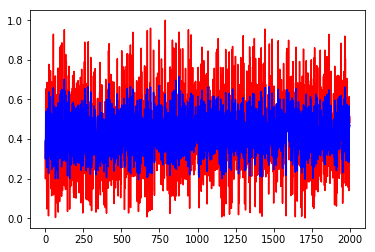

------------------------------------------------------
Learning rate(alpha) =  0.5
---------------Iteration  4000 -----------------
---------------Iteration  8000 -----------------
Graph :- 


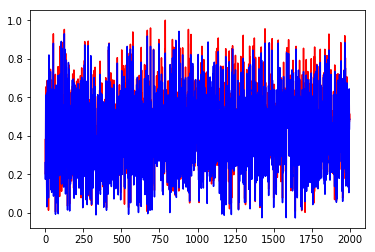

------------------------------------------------------
Learning rate(alpha) =  0.811
---------------Iteration  4000 -----------------
---------------Iteration  8000 -----------------
Graph :- 


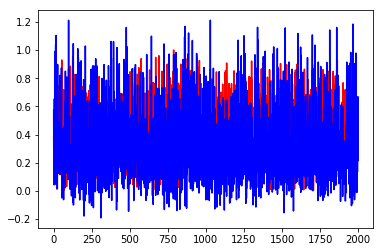

------------------------------------------------------
Learning rate(alpha) =  0.96
---------------Iteration  4000 -----------------
---------------Iteration  8000 -----------------
Graph :- 


C:\Users\jogle\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in square
  app.launch_new_instance()


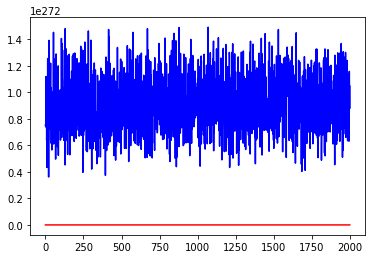

[20.922308782946402, 11.034450326506983, 5.836402394527553, 4.6409605194687105, 2.2700976243555417, 14.946419696010361, inf]


In [29]:
test_alpha = [0.00000001,0.00005,0.0005,0.0010,0.50,0.811,0.96]
y_with_diff_alpha = []
rmse_for_diff_alpha = []
print("### Now Checking the repsponse of LMS on different alpha ###")
for i in range(len(test_alpha)):
    lms = LMS(test_alpha[i])
    print("------------------------------------------------------")
    print("Learning rate(alpha) = ",test_alpha[i])
    lms.train(X_train_lms, T_train_lms)
    Y_temp = lms.use(X_test_lms)
    y_with_diff_alpha.append(Y_temp)
    rmse_temp = rmse(T_test_lms,Y_temp)
    rmse_for_diff_alpha.append(rmse_temp)
    print("Graph :- ")
    plt.figure()
    plt.plot(T_test_lms, '-r')
    plt.plot(y_with_diff_alpha[i], '-b')
    plt.show()
    plt.legend

print(rmse_for_diff_alpha)

## Visualization :-

- From the above graph, it can be concluded that value of alpha plays very important role in the predication.
- Value of alpha should be selected in such a way that, convergence does not occur.
- For the testing purpose, I chose one set of alpha values to run the code. Set contains the range from very smaller number to relatively larger number hence we can clearly see the difference in prediction in all range of alpha values.
    - Set = [0.000000000000000090,0.00005,0.0005,0.0010,0.50,0.813,0.96]
- From the observation, it can be seen that rmse is lowest for $\alpha$ = 0.5.
- To have more clear view of this, plotting line graph.

Text(0.5, 1.0, 'Alpha/RMSE Error Value')

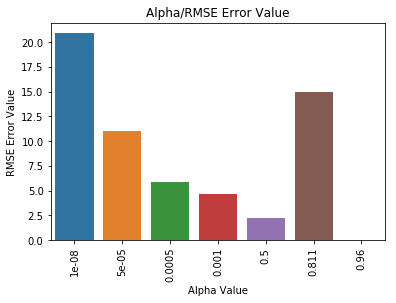

In [30]:
sns.barplot(x=test_alpha, y=rmse_for_diff_alpha)
plt.xticks(rotation= 90)
plt.xlabel('Alpha Value')
plt.ylabel('RMSE Error Value')
plt.title('Alpha/RMSE Error Value')

### Visualization :- 

1. In case of LMS, Learning rate is very important in the prediction. We have to set learning rate in such a way that it predicts more accurately.
2. RMS error value at 0.96 is infinity and hence it can not be plotted in the bar graph and hence it is coming as blank.
3. For very low learning rate and for very high learning rate(extreme cases) root mean square error will be more.


## Analysis and Comparision of algorithms:-

Least Square method is highly dependent on the distribution of the data. If multiple outliers are present in the data then it does not give better results. Along with the outliers it also depends on the distribution of data. If data is not normally distributed them rmse value will be much larger.

Least Mean Square method is dependent on alpha. As the value of alpha is decided by trail and error method, it is very difficult to find the proper alpha value which can be used to train out LMS model. Also in LMS we need to update weight after every iteration and hence it is slightly complicated to implement this logic as compared to LS.

Implementation of the 'Least Square' is much simpler than that of 'Least Mean Square', as in the LS we only have to apply one equation to find the weight whereas in LMS, we need to update weight after every iteration. 

By considering all the observations done above, I think LS performs slightly better than the LMS. One of the reason for this is that accuracy of LMS depends highly on the learning rate.Looking at the plots it can be seen that the predicted value and actual target value is somewhat similar in LMS when learning rate is 0.5. But still the mathematical value of RMS error is more than that of LS.

# Conclusions

Below are some important things that I have learnt form this assignment.

1. It is very important to preprocess the data as data contains may contains multiple null values, outliers etc.
2. Also it is very cruicial to normalize / rescale the features data points to have more normalized distribution.
3. This helps in reducing the rms error and also improves the accuracy.
4. Another important thing, that I have learnt is that accuracy of LMS is highly dependent on $\alpha$ (Learning Rate) value and it is very difficult to choose accurate learning rate.
5. Another challenging thing that I found in this assignment is matrix manipulation part. This plays vital role in the implementation of linear regression algorithms such as LS and LMS.


# References

1. 'California House Price Data'(1990-2017), Retrieved from https://www.kaggle.com/camnugent/california-housing-prices/home
2. Matplotlib. Retrieved from https://matplotlib.org/
3. Jupyter notebook Markdown tutorial,Retrieved from https://sourceforge.net/p/jupiter/wiki/markdown_syntax/
4. StackOverflow ,Retrieved from https://stackoverflow.com/questions/5181833/how-to-change-the-face-color-of-a-plot-using-matplotlib
5. Data Normalization Concept, Retrieved from https://www.statisticshowto.datasciencecentral.com/normalized/

# Extra Credit

If you want to work more for an extra credit, place your work here for additional analysis: weight and residual analysis. 
Try to answer to the following questions: 
- what is the most and least significant features for your data.
- what are the consequences if you remove those features from the model? (Show your work!)
- produce residual plots and observe the patterns for the goodness of fit    
    
**Note: the extra credit is an additional work that needs complete programming, experiments, analysis, and writing to get one. **

## Extra Credit:-

### - Most and Least Significant Feature Selection

__We have already plot the correlation matrix, and we already have the scores for the features which are closely related to each other. Now Plotting bar graph of these values so that we can choose best features and train our model.__

Text(0, 0.5, 'Variable')

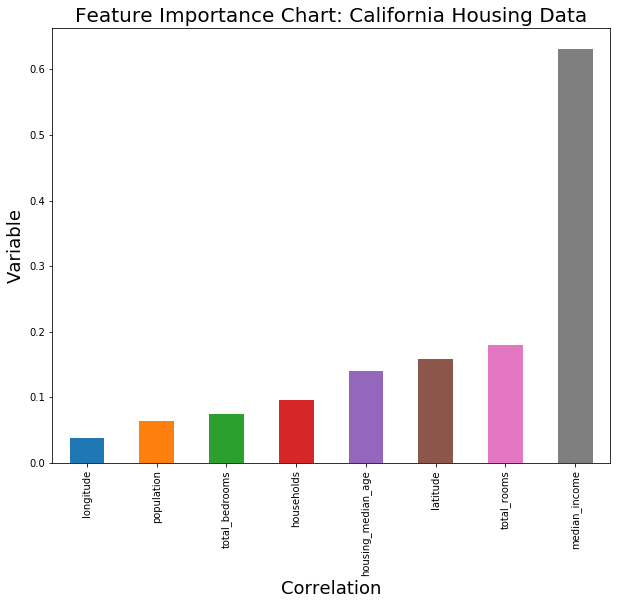

In [31]:
##### Feature Selection ######
feature_list = abs(data2.corr().iloc[:-1,-1]).sort_values()
feature_list 
feature_list.plot(kind='bar', figsize=(10,8))
plt.title('Feature Importance Chart: California Housing Data', fontsize = 20)
plt.xlabel('Correlation', fontsize=18)
plt.ylabel('Variable', fontsize=18)

### Feature Importance Chart:-
- Looking at the above graph 'median_income', 'total_rooms', 'latitude', 'housing_median_age', 'households' seems to related to reach other closely. Hence choosing some of these features only to tain our LS and LMS models.
- While choosing the feature, I am also considering the scatter plot that I have implemented as a part of pre processing.
- In the scatter plot, 'population','total_bedrooms','median_income','total_rooms' are following linear pattern for target variable as 'households'.
- Hence considering mutual exclusive set of these two sets as a important feature set.
- Creating one new dataframe with these attributes and checking the reult.

## Analysing the behavior of 'most' significant features using LS and LMS models ###

In [32]:
X_imp_total = data2[['population','total_bedrooms','median_income','total_rooms']].copy()
T_imp_total = data2[['households']].copy()

- Now let us train LS as well as LMS models with above feature set and check the result.

RMS error between actual and predicted taget for train data is :-  1.801025894448522


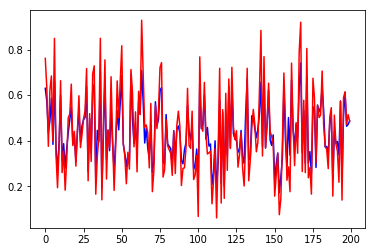

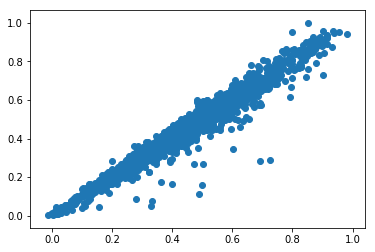

In [33]:
###### Implementation of Least Square ########
# Train data split
X_imp_train = X_imp_total.iloc[0:8000].values
T_imp_train = T_imp_total.iloc[0:8000].values
# Test data split
X_imp_test = X_imp_total.iloc[8000:10000].values
T_imp_test = T_imp_total.iloc[8000:10000].values
######## Train model using test data ###########
ls_imp = LinearRegress()
w_imp_from_Train = ls_imp.train(X_imp_train, T_imp_train)
########## Predict the result on test data ##########
Y_imp = ls_imp.use(X_imp_test)
#print(Y)
plt.plot(Y[1800:2000],'-b')
plt.plot(T_test[1800:2000],'-r')
print("RMS error between actual and predicted taget for train data is :- ",rmse(T_imp_test,Y_imp))
plt.figure()
plt.scatter(Y_imp,T_imp_test)
plt.show()

### Observation :-

1. Above scatter shows rhw similar behaviour as that of one we have selected above.
2. So, It can be concluded that these are the features which are dominating in giving the more accuracy in case of LS.
3. Implementing LMS  method on same set of feature set and checking the response.

Train Shape Check: (8000, 4) (8000, 1)
Test Shape Check: (2000, 4) (2000, 1)
---------------Iteration  4000 -----------------
---------------Iteration  8000 -----------------


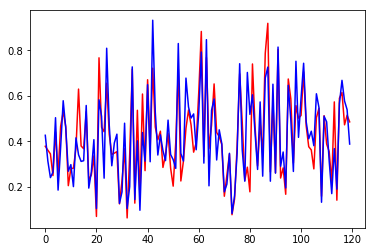

In [34]:
######### LMS Implementation #######
# Train data split
X_imp_train_lms = X_imp_total.iloc[0:8000].values
T_imp_train_lms = T_imp_total.iloc[0:8000].values
print("Train Shape Check:", X_imp_train_lms.shape, T_imp_train_lms.shape)
# Test data split
X_imp_test_lms = X_imp_total.iloc[8000:10000].values
T_imp_test_lms = T_imp_total.iloc[8000:10000].values
print("Test Shape Check:", X_imp_test_lms.shape, T_imp_test_lms.shape)
######################
lms2 = LMS(0.00000002)
lms2.train(X_imp_train_lms, T_imp_train_lms)
Y_imp_lms = lms2.use(X_imp_test_lms)
plt.plot(T_imp_test_lms[1880:2000], '-r')
plt.plot(Y_imp_lms[1880:2000], '-b')
#######################

### Observation :-

Output graph of the LMS with important features are similar to that we have already plot above. Hnce we can say that the feature set that we have selected plays important role in deciding the accuracy.

We can remove this set of features from original set and check the response on output graphs. In order to visualize the effect, making feature set of non important feature and running on LS and LMS models.

## Analysing the behavior of 'least' significant features using LS and LMS models ###

In [35]:
########## Analysing performance of LS and LMS on least Significant Featers ##########
X_nimp_total = data2[['longitude','latitude','median_house_value','housing_median_age']].copy()
T_nimp_total = data2[['households']].copy()

RMS error between actual and predicted taget for train data is :-  8.3359827211612


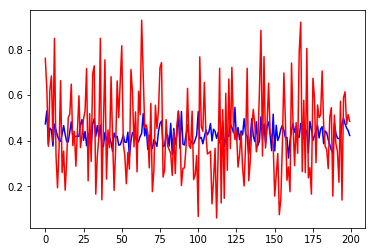

In [36]:
###### Implementation of Least Square ########
# Train data split
X_nimp_train = X_nimp_total.iloc[0:8000].values
T_nimp_train = T_nimp_total.iloc[0:8000].values
# Test data split
X_nimp_test = X_nimp_total.iloc[8000:10000].values
T_nimp_test = T_nimp_total.iloc[8000:10000].values
######## Train model using test data ###########
ls_nimp = LinearRegress()
w_nimp_from_Train = ls_nimp.train(X_nimp_train, T_nimp_train)
########## Predict the result on test data ##########
Y_nimp = ls_nimp.use(X_nimp_test)
#print(Y)
plt.plot(Y_nimp[1800:2000],'-b')
plt.plot(T_nimp_test[1800:2000],'-r')
print("RMS error between actual and predicted taget for train data is :- ",rmse(T_nimp_test,Y_nimp))

Train Shape Check: (8000, 4) (8000, 1)
Test Shape Check: (2000, 4) (2000, 1)
---------------Iteration  4000 -----------------
---------------Iteration  8000 -----------------
RMS error between actual and predicted taget for train data is :-  8.815886998375317


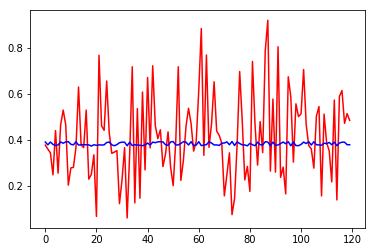

In [37]:
######### LMS Implementation #######
# Train data split
X_nimp_train_lms = X_nimp_total.iloc[0:8000].values
T_nimp_train_lms = T_nimp_total.iloc[0:8000].values
print("Train Shape Check:", X_imp_train_lms.shape, T_imp_train_lms.shape)
# Test data split
X_nimp_test_lms = X_nimp_total.iloc[8000:10000].values
T_nimp_test_lms = T_nimp_total.iloc[8000:10000].values
print("Test Shape Check:", X_nimp_test_lms.shape, T_nimp_test_lms.shape)
######################
lmsn2 = LMS(0.00000002)
lmsn2.train(X_nimp_train_lms, T_nimp_train_lms)
Y_nimp_lms = lmsn2.use(X_nimp_test_lms)
plt.plot(T_nimp_test_lms[1880:2000], '-r')
plt.plot(Y_nimp_lms[1880:2000], '-b')
#######################
print("RMS error between actual and predicted taget for train data is :- ",rmse(T_nimp_test_lms,Y_nimp_lms))

### Observation :-

- In the above graph, we can see that the RMS error is more when we remove expected most significant features. 
- Hence we can conclude that the feature set ['population','total_bedrooms','median_income','total_rooms'] that we chose as the most significant holds.

## Plotting Residual Plots:-

Text(0.5, 1.0, 'Residual Plot for Least Mean Squares with Important features')

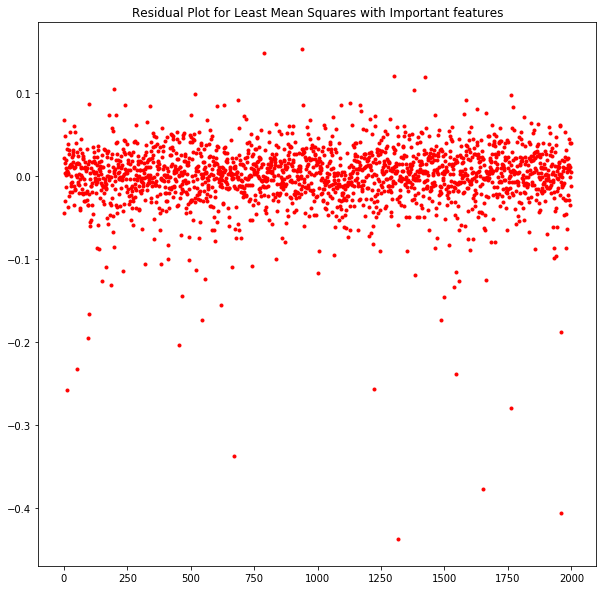

In [38]:
diff = T_imp_test - Y_imp
number = np.arange(len(T_imp_test))
fig=plt.figure(figsize=(10, 10))
plt.scatter(number,diff,marker='.',color='red')
plt.title("Residual Plot for Least Mean Squares with Important features")

Text(0.5, 1.0, 'Residual Plot for Least Mean Squares with Important features')

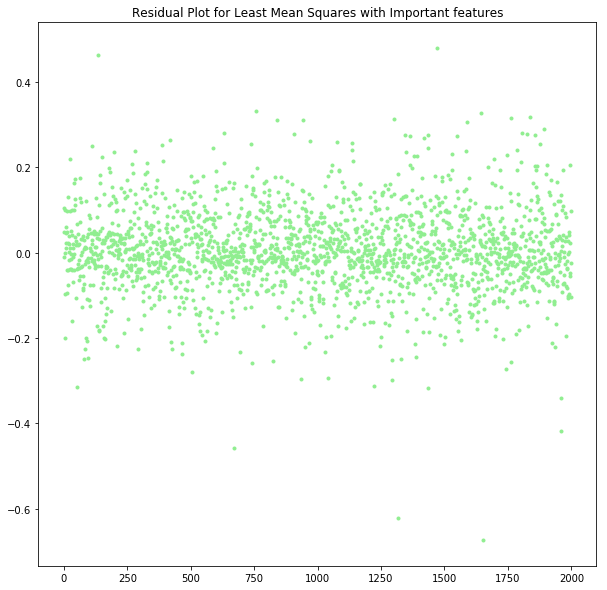

In [39]:
diff = T_imp_test_lms - Y_imp_lms
number = np.arange(len(T_imp_test_lms))
fig=plt.figure(figsize=(10, 10))
plt.scatter(number,diff,marker='.',color='lightgreen')
plt.title("Residual Plot for Least Mean Squares with Important features")

Text(0.5, 1.0, 'Residual Plot for Least Squares without Important features')

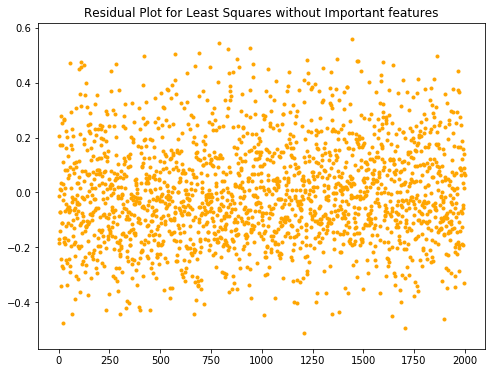

In [40]:
diff = T_nimp_test - Y_nimp
number = np.arange(len(T_nimp_test))
fig=plt.figure(figsize=(8, 6))
plt.scatter(number,diff,marker='.',color='orange')
plt.title("Residual Plot for Least Squares without Important features")

Text(0.5, 1.0, 'Residual Plot for Least Mean Squares without Important features')

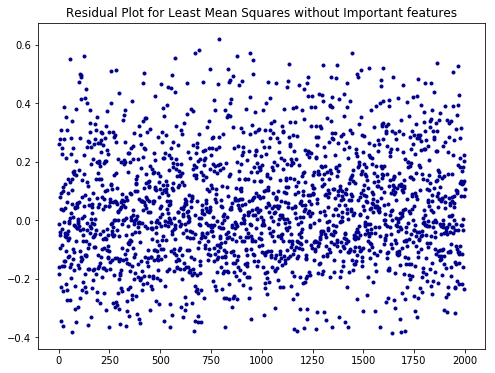

In [41]:
diff = T_nimp_test_lms - Y_nimp_lms
number = np.arange(len(T_nimp_test_lms))
fig=plt.figure(figsize=(8, 6))
plt.scatter(number,diff,marker='.',color='darkblue')
plt.title("Residual Plot for Least Mean Squares without Important features")

## Observation(Residual Plots) :- 

1. From the above residual plots, it can be inferred that the data points in the feature set with most important features are more concentrated in the range between -1.5 to 1.5. Hence this features are can be considered as the good features and hence our hypothesis holds.
2. In the feature set without important features, the data is distributed in wide variety of range and hence this set of features will not help in the linear regression of LS and LMS models.

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run well after running your codes. 

Points | | Description
--|--|:--
5 | Introduction  
20 | Data | 
 | 5| description 
 | 5| plots for understanding or analysis 
 | 5| preliminary observation 
 | 5| Preprocessing of the data 
40 | Method | 
 | 5| review
 | 5| explanation of codes
 | 30| Correct implementation (preliminary test)
30 | Experiments | 
 | 5| description, codes
 | 10| visualization of results
 | 15| analysis / comparison of algorithms
5 | Conclusions, References 